# Final Project
### Group menbers: XiaoLan Li, Zhihong Zhang

## Introduction

Describe your project, including the scientific or business motivation for the research question you have chosen to answer. This section should summarize the content of your Final Project Proposal, so be sure to explain your research question, describe the source and content of the data set you have chosen to work with, and summarize your approach to meeting the requirements for the Project. 


Credit plays an increasingly important role in our daily life. According to [The USA GOV](https://www.usa.gov/credit-reports), a credit report and score can affect people's ability to get a loan, or even qualify for a job.

Therefore, for our project, we focus on credit card running company. One of our data set is from Kaggle includes applicant information and historical credit payment. It is from an anonymous  financial company that wants to identify the applicant is qualified to be approved a credit card. It has , 20 columns and 777715 raws. The response variable is 'STATUS'.

For our project, the main research question will be how to identify the target credit card applicant and how long the applicants might default. To reach the answer to questions, through EDA work, we will answer what kind of features can help to identify.

After collecting the recoding data of applicants, which includes personal information and historical credit score, finishing the analysis, we are going to build a series of predictive models to find whether the applicant will be approved or not. The main features of how to affect a applicant will be approved will be used in our feature selection.

The result of our research will help the bank be able to decide whether to issue a credit card to the applicant and reduce the risk of losses to the bank due to default.

## Data Aquisition

### First dataset resource

read record of Applicant Information and Historical Credit Payment 

In [ ]:
import numpy as np
import pandas as pd

# check and read the application dataset from github
df_application = pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/Final%20Project/application_record.csv')
df_application.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [ ]:
# check and read the credit dataset from github
df_credit =pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/Final%20Project/credit_record.csv')
df_credit.head(5)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# merge two dataset resources
df_record = df_application.merge(df_credit, on='ID')
df_record.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C


In [ ]:
# check the record dataset info
df_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

### Data Discription
__ID__	Client number	
__CODE_GENDER__	Gender	
__FLAG_OWN_CAR__	Is there a car	
__FLAG_OWN_REALTY__	Is there a property	
__CNT_CHILDREN__	Number of children	
__AMT_INCOME_TOTAL__	Annual income	
__NAME_INCOME_TYPE__	Income category	
__NAME_EDUCATION_TYPE__	Education level	
__NAME_FAMILY_STATUS__	Marital status	
__NAME_HOUSING_TYPE__	Way of living	
__DAYS_BIRTH__	Birthday	Count backwards from current day (0), -1 means yesterday	
__DAYS_EMPLOYED__	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.	
__FLAG_MOBIL__	Is there a mobile phone	
__FLAG_WORK_PHONE__	Is there a work phone	
__FLAG_PHONE__	Is there a phone	
__FLAG_EMAIL__	Is there an email	
__OCCUPATION_TYPE__	Occupation	
__CNT_FAM_MEMBERS__	Family size 	
__MONTHS_BALANCE__: The month of the extracted data is the starting point, backwards

0 is the current month

-1 is the previous month, and so on

__STATUS__:

0: 1-29 days past due

1: 30-59 days past due

2: 60-89 days overdue 

3: 90-119 days overdue 

4: 120-149 days overdue 

5: Overdue or bad debts, write-offs for more than 150 days 

C: paid off that month 

X: No loan for the month

In [ ]:
# check missing data
df_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

The 'OCCUPATION_TYPE' has a lot of missing values, we will go to check the missing percentage.

In [ ]:
df_record.isnull().sum()/df_record.shape[0]

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.308658
CNT_FAM_MEMBERS        0.000000
MONTHS_BALANCE         0.000000
STATUS                 0.000000
dtype: float64

The 'OCCUPATION_TYPE' has 30.8% missing data, since it is a lot so I will check the values in this column to see if we should fill it or drop it.

In [ ]:
df_record['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

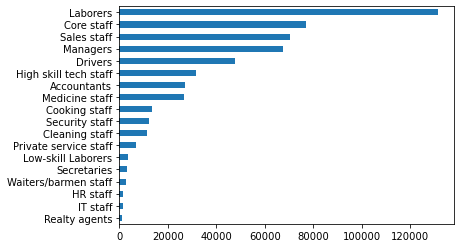

In [ ]:
# plot gragh
df_record['OCCUPATION_TYPE'].value_counts().sort_values().plot(kind = 'barh')

It's hard to fill out 30% various values in the occupation column. So we decide to drop this column.

In [ ]:
# drop 'OCCUPATION_TYPE'
df_record.drop('OCCUPATION_TYPE',axis = 1, inplace = True)

In [ ]:
# check database type count
df_record.dtypes.value_counts()

int64      9
object     8
float64    2
dtype: int64

We also know from the given information that there are 8 different category attributes and the rest are numeric attributes.

Understand the value of the data by looking at the distribution of the data roughly

In [ ]:
df_record.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,1.885348e+05,101622.450076,27000.0,121500.0,162000.0,225000.0,1575000.0
DAYS_BIRTH,777715.0,-1.612494e+04,4104.304018,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
DAYS_EMPLOYED,777715.0,5.777583e+04,136471.735391,-15713.0,-3292.0,-1682.0,-431.0,365243.0
FLAG_MOBIL,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,777715.0,2.318176e-01,0.421993,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0


From this table, we can find:
- the DAYS_EMPLOYED is recorded wrong since the max data is 365243, which is more than 1000 years and it's obviously impossible. I will check all positive values in this column specifically.

In [ ]:
# check the min value of DAYS_EMPLOYED
df_record[df_record.DAYS_EMPLOYED > 0 ]['DAYS_EMPLOYED'].min()

365243

The min value of the positive value in DAYS_EMPLOYED is exactly equal to the max, which make us confused. so we will continualy to check those unemployed customers information

In [ ]:
df_unemploy = df_record[df_record.DAYS_EMPLOYED > 0 ]
df_unemploy.sample(10).T

,389441,416716,580321,129973,745779,505620,167984,467586,78209,318311
ID,5068869,5088231,5113924,5029207,5148865,5096576,5150245,5091680,5023471,5061733
CODE_GENDER,F,F,F,F,F,F,F,F,F,F
FLAG_OWN_CAR,Y,N,N,N,N,N,N,N,Y,N
FLAG_OWN_REALTY,Y,Y,N,Y,Y,N,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,337500,135000,90000,180000,126000,117000,112500,112500,315000,135000
NAME_INCOME_TYPE,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner,Pensioner
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Married,Single / not married,Married,Married,Married,Married,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,House / apartment,House / apartment,Municipal apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment


In [ ]:
df_unemploy.NAME_INCOME_TYPE.unique()

array(['Pensioner'], dtype=object)

From the sample table as shown above, the unemployment customers are all Pensioner.This means the recorder use number 365243 to indicate the applicant is Pensioner.

Next, we start to check the response variable- STATUS.

### Response variable

We can get a rough view of the values in 'STATUS'

In [ ]:
df_record['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

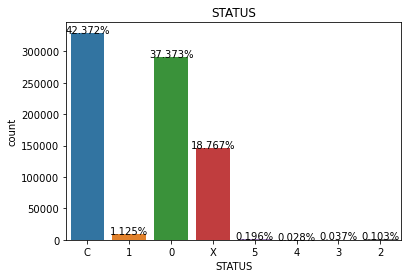

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(x="STATUS", data=df_record)
plt.title('STATUS')
total = len(df_record['STATUS'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

By looking at the STATUS gragh, the qualifier(C,X) is about 60%, 37% of customers defaulted for a month,  the rest for more than a month

In [ ]:
# check sample data
df_record.sample(5).T

,65721,713183,66573,305930,251596
ID,5022730,5142730,5022776,5061183,5050780
CODE_GENDER,M,M,F,M,M
FLAG_OWN_CAR,Y,Y,Y,Y,N
FLAG_OWN_REALTY,N,N,Y,Y,N
CNT_CHILDREN,3,1,0,0,0
AMT_INCOME_TOTAL,360000,144000,225000,135000,180000
NAME_INCOME_TYPE,Commercial associate,Working,Pensioner,Working,State servant
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Married,Married,Married,Single / not married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment


### Numerical variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182DD9320D0>,
      dtype=object)

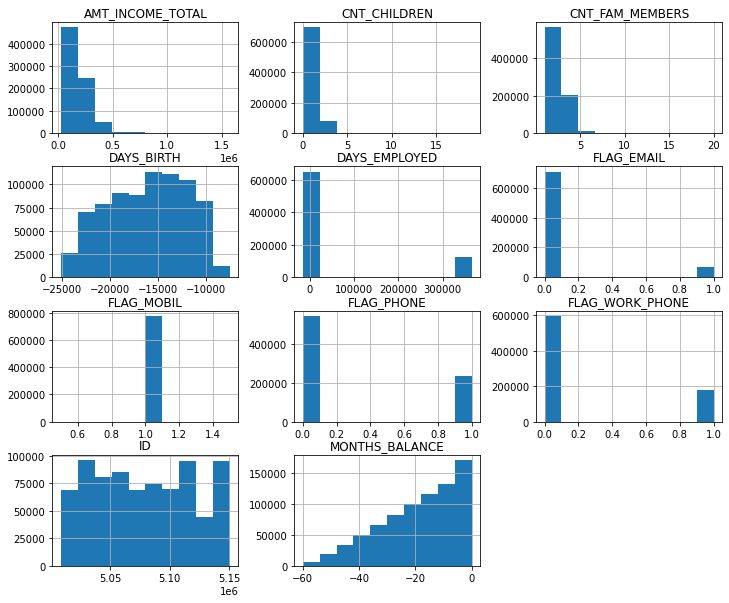

In [ ]:
df_record.hist(figsize=(12,10))

Based on the distribution of the numerical data set, we can find most customers:
- have 0 or few children
- have low income
- have more than about 27 years old(10000/365)
- all have mobile and it has only one value
- are employed for not too long
- don't have email
- have small family members

 

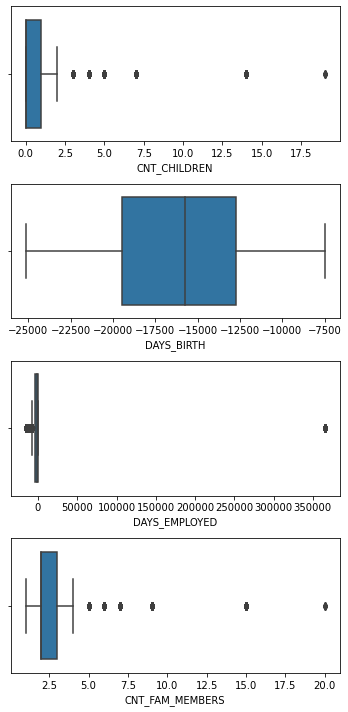

In [ ]:
#numerical attribute
num_cols = ["CNT_CHILDREN","DAYS_BIRTH","DAYS_EMPLOYED","CNT_FAM_MEMBERS"]

# set figure size
fig, axes =plt.subplots(4,1,figsize=(5,10))
for col, ax in zip(df_record[num_cols], axes):
    sns.boxplot(x= df_record[col], ax=ax, orient = 'h' )
plt.tight_layout()    
plt.show()

The outlier of 'DAYS_EMPLOYED' is 365243, which is a lable to customer who is Pensioner as we just analized.There are some outliers in 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS', which can be retained since they are valuable for our model.

### Categorical variable

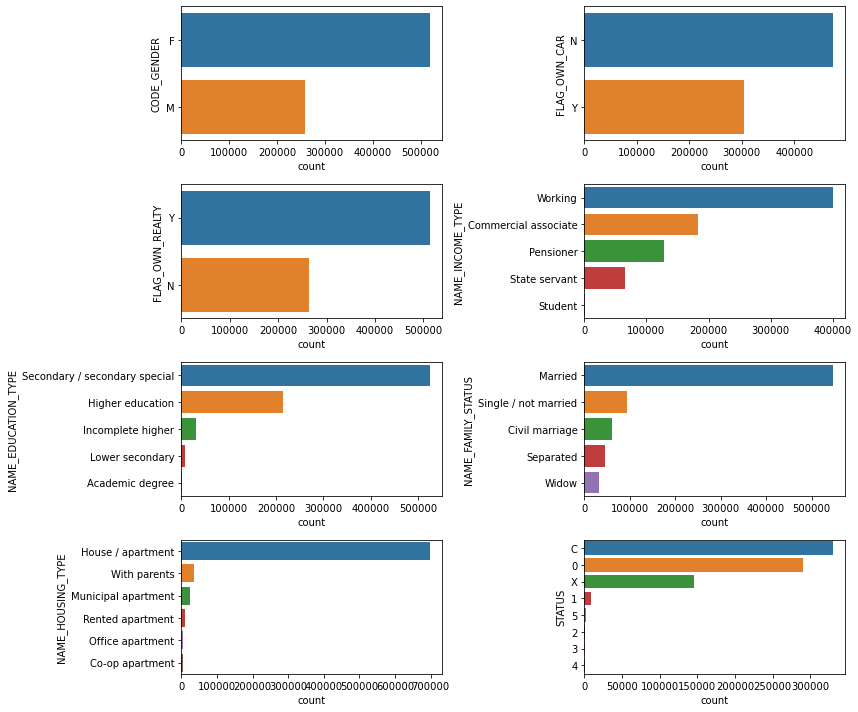

In [ ]:
#plot categorical data
fig, axes =plt.subplots(4,2, figsize=(12,10))
axes = axes.flatten()

object_bol = df_record.dtypes == 'object'
for ax, catplot in zip(axes, df_record.dtypes[object_bol].index):
    gragh = sns.countplot(y=catplot, data=df_record, ax=ax, order=df_record[catplot].value_counts().index)
    
plt.tight_layout()  
plt.show()

Based on the distribution of the categorical data set, we can find most customers:
- have more than higher education level
- are married
- have House/apartment housing type

 

In [ ]:
# check the value count in 'NAME_HOUSING_TYPE' 
df_record.NAME_HOUSING_TYPE.value_counts()/df_record.NAME_HOUSING_TYPE.count() *100

House / apartment      89.640935
With parents            4.594871
Municipal apartment     3.168256
Rented apartment        1.401285
Office apartment        0.724687
Co-op apartment         0.469967
Name: NAME_HOUSING_TYPE, dtype: float64

Through the count number and diagram, we know the majority values in 'NAME_HOUSING_TYPE' variable is House/apartment, which means we can seperate the value to 1 and 0 display is a applicant has house or not.

After EDA process, we need to handle the import data now.

## Data Preparation & Prepped Data Review

### Dealing with repetative data

We need to check row of the data to ensure there is no repetative data

In [ ]:
# check duplicate in the dataset
df_record[df_record['ID'].duplicated(keep=False)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0


In [ ]:
#choose one row to check the duplicate
df_record[df_record['ID'] ==  5150337]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777701,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,0,0
777702,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-1,0
777703,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-2,0
777704,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-3,0
777705,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-4,0
777706,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-5,0
777707,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-6,0
777708,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-7,0
777709,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-8,0
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0


Interesting , just for candidate 5150337, he/she has quite different result along with duplicates. We need to alter the history record for each applicant to only one record since all attributes for each applicant are the same besides the 'MONTHS_BALANCE'.

Based on the Data attribution, 'MONTHS_BALANCE' means each month record. In order to determine wheather an applicant is a qulifier or defalter, we use only the most recently record of the status infomation for each applicant.

In [ ]:
# encode the qualifier
df_record['STATUS'][df_record["STATUS"] == 'C'] = -1
df_record['STATUS'][df_record["STATUS"] == 'X'] = -1
df_record.head()

<ipython-input-28-0f28d574e699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_record['STATUS'][df_record["STATUS"] == 'C'] = -1
<ipython-input-28-0f28d574e699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_record['STATUS'][df_record["STATUS"] == 'X'] = -1


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,-1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,-1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,-1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,-1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,-1


In [ ]:
df_record['STATUS'] = df_record.STATUS.astype('int32')

We can tell dupliates with same ID has same value on other column, now we are safe to drop duplicates.

In [ ]:
# select the first row sort by STATUS
df_record.sort_values(by = 'STATUS',ascending = False,inplace = True)# 
df_record.drop_duplicates(subset = ['ID'],inplace = True)

df_record.sort_values("ID", inplace = True)
df_record.index = pd.RangeIndex(len(df_record.index))
df_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-13,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-12,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-11,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-2,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-24,-1


In [ ]:
df_record.shape

(36457, 19)

In [ ]:
# check the STATUS values and account after droping the duplicates
df_record.STATUS.value_counts()

 0    27711
-1     4455
 1     3675
 2      314
 5      180
 3       76
 4       46
Name: STATUS, dtype: int64

We assume that STATUS is greater than 0 means that the applicant is a defaulter, where 0-2 means minor default, and the other means severe default

In [ ]:
df_record['STATUS'] = df_record.STATUS.apply(lambda x : 0 if 0<=x<=2 else( 2 if x>2 else 1))
# drop the  column we don't need
df_record.drop(['MONTHS_BALANCE'],axis = 1,inplace = True)
df_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1


Next, based on the previous EDA, we can drop the 'FLAG_MOBIL' since it only includes one unique value.

In [ ]:
df_record.drop('FLAG_MOBIL',axis = 1, inplace = True)
# check current dataset columns
df_record.columns.to_list()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS']

### Encoding Categorical Columns

Next, I will go and check the categorical data values and lable encoding them to digital values.

In [ ]:
# get catogorical column name list
cat_cols = df_record.dtypes[df_record.dtypes == 'object'].index.to_list()
cat_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [ ]:
# check all categorical columns values and count

display(df_record['CODE_GENDER'].value_counts())

display(df_record['FLAG_OWN_CAR'].value_counts())

display(df_record['FLAG_OWN_REALTY'].value_counts())

display(df_record['NAME_INCOME_TYPE'].value_counts())

display(df_record['NAME_EDUCATION_TYPE'].value_counts())

display(df_record['NAME_FAMILY_STATUS'].value_counts())

display(df_record['NAME_HOUSING_TYPE'].value_counts())

F    24430
M    12027
Name: CODE_GENDER, dtype: int64

N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

From above information, we are going to encode value on columns``

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encoding columns
lb = LabelEncoder()

df_record['CODE_GENDER'] = lb.fit_transform(df_record['CODE_GENDER'])
df_record['FLAG_OWN_CAR'] = lb.fit_transform(df_record['FLAG_OWN_CAR'])
df_record['FLAG_OWN_REALTY'] = lb.fit_transform(df_record['FLAG_OWN_REALTY'])
df_record['NAME_FAMILY_STATUS'] = lb.fit_transform(df_record['NAME_FAMILY_STATUS'])
df_record['NAME_HOUSING_TYPE'] = lb.fit_transform(df_record['NAME_HOUSING_TYPE'])
df_record['NAME_INCOME_TYPE'] = lb.fit_transform(df_record['NAME_INCOME_TYPE'])
df_record['NAME_EDUCATION_TYPE'] = lb.fit_transform(df_record['NAME_EDUCATION_TYPE'])

df_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,2.0,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,1


In [ ]:
# Alter the DAY_BIRTH to age and DAYS_EMPLOYED to years

df_record['AGE'] = df_record['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))
# before be calculate the YEARS_EMPLOYED, I will replace the 365243 of Pensioner to 0 day to avoid confusion in further plot.
df_record['DAYS_EMPLOYED'] = df_record['DAYS_EMPLOYED'].replace(365243,0)
df_record['YEARS_EMPLOYED'] = df_record['DAYS_EMPLOYED'].apply(lambda x: round(abs(x/365),2))

df_record.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=True)
df_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,0,0,2.0,0,33,12.44
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,0,0,2.0,0,33,12.44
2,5008806,1,1,1,0,112500.0,4,4,1,1,0,0,0,2.0,0,59,3.11
3,5008808,0,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,0,52,8.36
4,5008809,0,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,1,52,8.36


In [ ]:
df_record.shape

(36457, 17)

Until now, we adjust all categorical data to digital, which can help to build the model..

Now we finished the data preparation. We can re-run our EDA to see the difference.

### Prepped Data Review

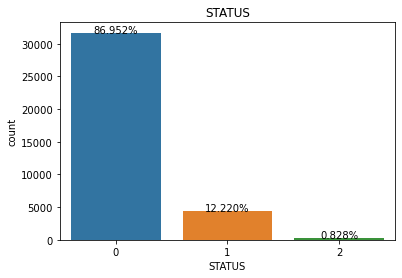

In [ ]:
ax = sns.countplot(x="STATUS", data=df_record)
plt.title('STATUS')
total = len(df_record['STATUS'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

Obviously, the STATUS value discription is changed and it's imbalanced since we drop the duplicates. There are only 12% qualifier, 87% are minus defaulter and the few rest customers are severe defaulter.

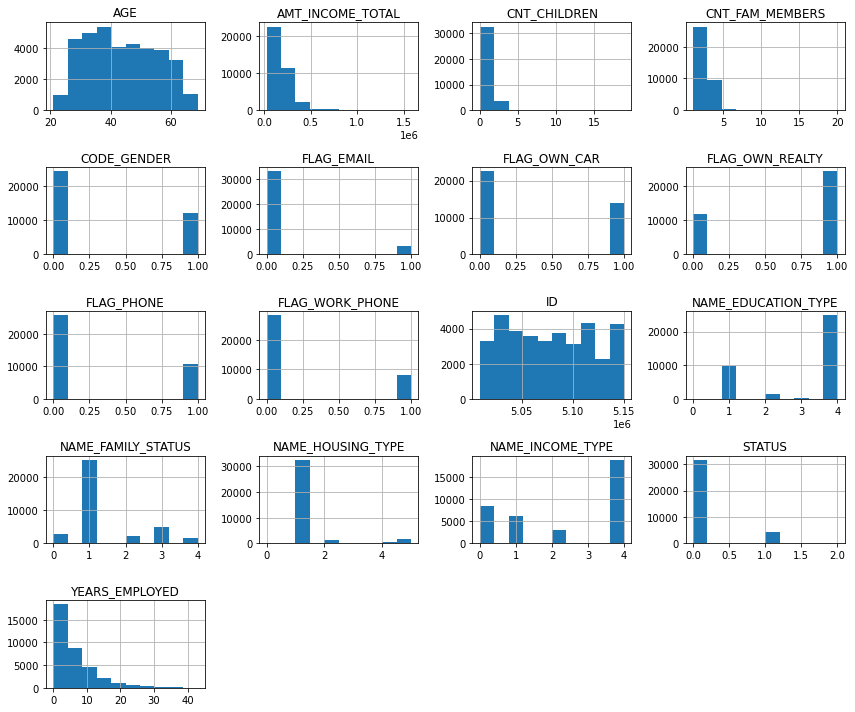

In [ ]:
df_record.hist(figsize=(12,10))
plt.tight_layout()

Now we can see that after processing the duplicate model and encoding the data values, the distribution of some columns has changed, but not much.

### Relationship
Then we are going to see their relationship.

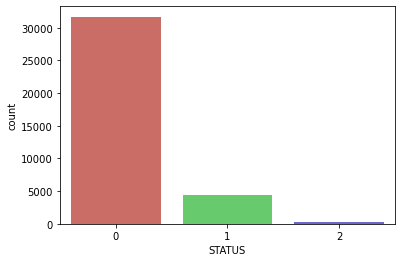

In [ ]:
# check the response value with label datas
label_chart = sns.countplot(x = 'STATUS', data = df_record, palette= 'hls')

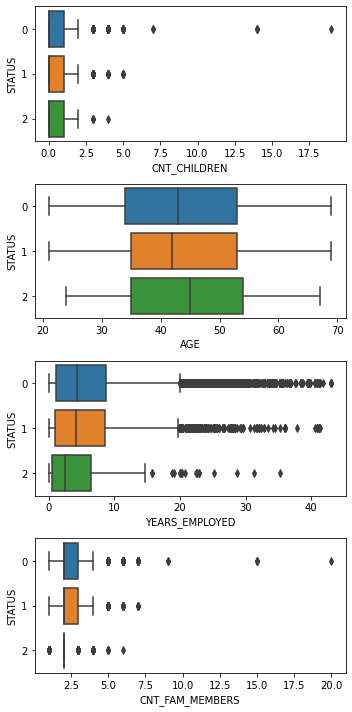

In [ ]:
# relationship of numerical data

fig, axes =plt.subplots(4,1, figsize=(5,10)) #, sharex=True
axes = axes.flatten()

num_cols = ["CNT_CHILDREN","AGE","YEARS_EMPLOYED","CNT_FAM_MEMBERS"]
for ax, col in zip(axes, df_record[num_cols]):
    g = sns.boxplot(x= df_record[col], y = df_record.STATUS,ax=ax, orient = 'h')

plt.tight_layout()  
plt.show()


All numeric columns are distributed as almost same as before except the YEARS_EMPLOYED. This can make sense since the previous outlier is so big that hiden other outliers.

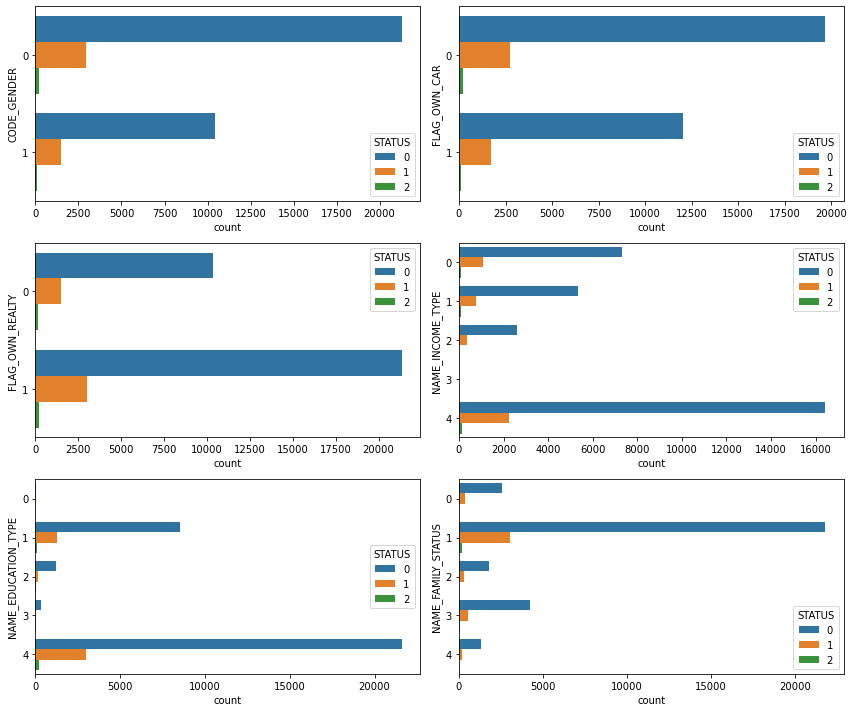

In [ ]:
#plot categorical data
fig, axes =plt.subplots(3,2, figsize=(12,10))
axes = axes.flatten()

for ax, catplot in zip(axes, cat_cols):
    gragh = sns.countplot(y=catplot, data=df_record, ax=ax, hue = 'STATUS')
plt.tight_layout()  
plt.show()

 This categorical part reveals some interesting fact:
- number of minus defaulter are much more than qualifier. This is because the imbalanced response data

We continue to check heatmaps.

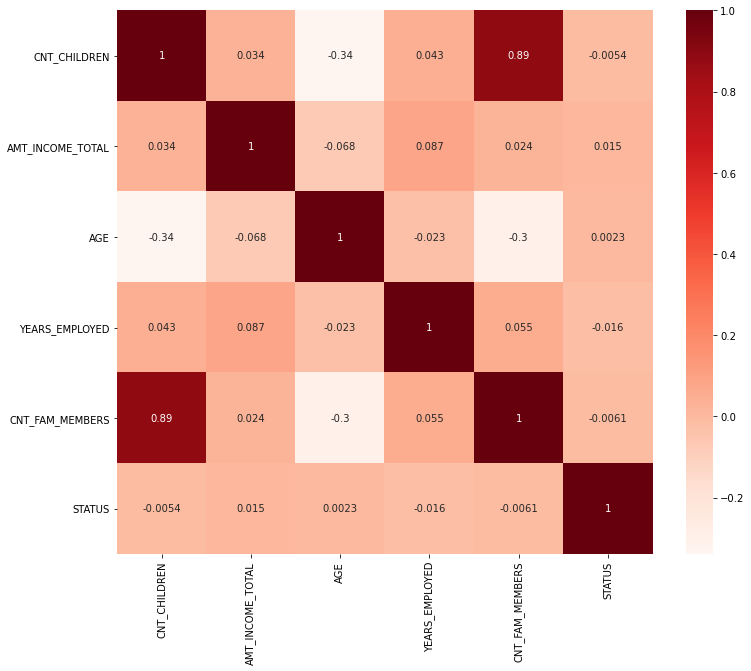

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))

corr = df_record[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS','STATUS']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

In this heatmap, if only look at this coorelation matrix, we have these findings:

- There are very weak relationship between other features and STATUS

- One thing noticeable is that CNT_FAM_MEMBERS and CNT_CHILDREN showed a strong collinearity. It make sense that generally since higher number of family members has more children. Overall, all value does not show a strong corelation among them.

Then we are going to prepare the useful indicators for model in Research Questions

## Research

Now we can see that after processing the duplicate model and encoding the data values, the distribution of some columns has changed, but not much.
Based on the information given, we will explore which attributes (such as occupation or education level) or combination of attributes may be the most important predictive attributes.
To find out, we will use chi-square to test relevant scores for categorical columns.
In addition, we will import our second data set from the UCI open source data set, which contains customer information and real-world responses to help us determine the features that fit our predictive model.

### Chi-square testing for selecting categorical feature

We will use chi-squared statistic for feature selection on categorical data. To use chi-square test，we also need to run ordinalcoder to the explantory variable. variable. Then select K best function is to select the k lowest p-values based on chi2 Statistics. Thus p value gave the score of these relevant features.

In [ ]:
# categorized data after droping the numerical data
cat_data= df_record.drop(['ID','CNT_CHILDREN','AMT_INCOME_TOTAL','AGE', 'YEARS_EMPLOYED'], axis = 1).copy()

In [ ]:
#sanity check
cat_data.head(4)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,1,1,1,4,1,0,4,1,0,0,2.0,0
1,1,1,1,4,1,0,4,1,0,0,2.0,0
2,1,1,1,4,4,1,1,0,0,0,2.0,0
3,0,0,1,0,4,3,1,0,1,1,1.0,0


In [ ]:
# set data and response columns
X = cat_data.drop(columns = ['STATUS'])
y = cat_data['STATUS'].astype('category')

In [ ]:
# Print before and after smote data value counts comparison
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(y == 2))) 

# import SMOTE module from imblearn library 
# pip install imblearn 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 

Before OverSampling, counts of label '1': 4455
Before OverSampling, counts of label '0': 31700 

Before OverSampling, counts of label '2': 302 

After OverSampling, the shape of train_X: (95100, 11)
After OverSampling, the shape of train_y: (95100,) 

After OverSampling, counts of label '1': 31700
After OverSampling, counts of label '0': 31700
After OverSampling, counts of label '2': 31700


In [ ]:
from sklearn.model_selection import train_test_split

#The data is divided into training set and test set
X_train,X_test,Y_train,Y_test = train_test_split(X_train_res,y_train_res,test_size = 0.3,random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(66570, 11)
(66570,)
(28530, 11)
(28530,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# train the algorism

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_res,y_train_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['element','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False) # set the order from high to low
featureScores.T

,3,1,2,9,7,5,8,6,4,10,0
element,NAME_INCOME_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_EMAIL,FLAG_WORK_PHONE,NAME_FAMILY_STATUS,FLAG_PHONE,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER
Score,1204.51,1010.99,674.122,607.514,432.368,371.52,345.778,224.69,211.915,186.728,140.689


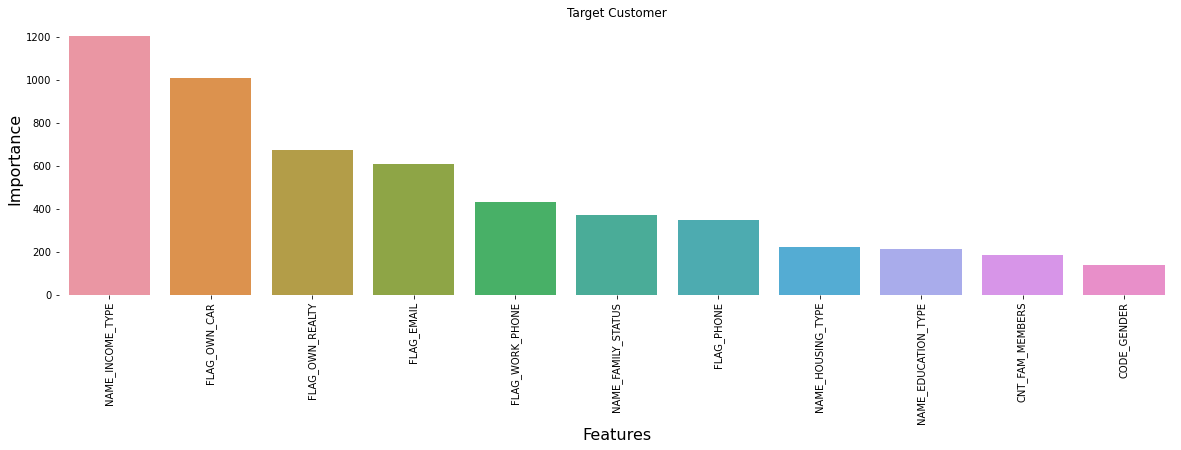

In [ ]:
# plot sort importance features
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='element', y='Score', data= featureScores)
plt.box(False)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.title('Target Customer')
plt.show()

Based on the score, we choose the 3 most important categorical features.


Combining our analysis of both features from numerical and categorical variables.
We choose features as follows:
- NAME_INCOME_TYPE	
- FLAG_OWN_CAR	
- FLAG_OWN_REALITY
- 'CNT_CHILDREN'
- 'YEARS_EMPLOYED'
- AGE


Inorder to confirm the features we selected is valid, we will import the real probability of defaulter credit card dataset to compare the feature importance since the response of default is true.

In [ ]:
import pandas as pd
df_default = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", header =1)
df_default.head(3) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### Data Attribution:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [ ]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df_default['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

default payment next month
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE, dtype: object

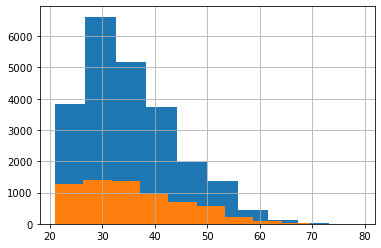

In [ ]:
df_default.groupby('default payment next month').AGE.hist()


The qualifier age are seemly focus on 30-40 years old

In [ ]:
# categorized data
default_cat_data= df_default[['SEX','EDUCATION','MARRIAGE']]

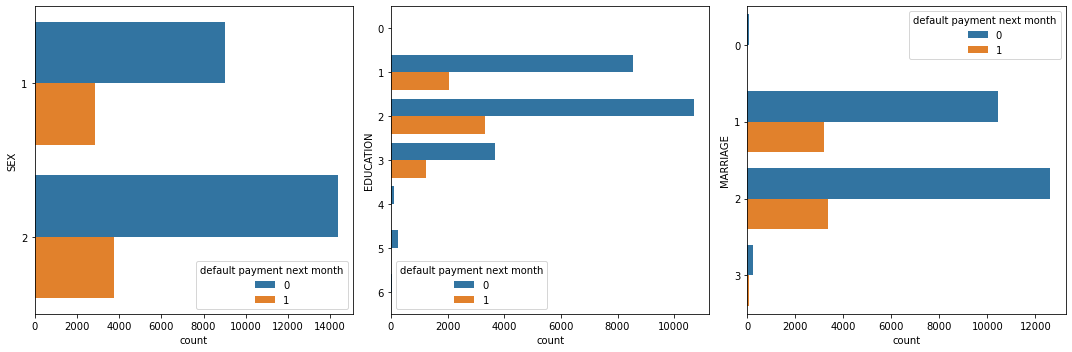

In [ ]:
#plot categorical data
fig, axes =plt.subplots(1,3, figsize=(15,5))
axes = axes.flatten()

for ax, catplot in zip(axes, default_cat_data):
    gragh = sns.countplot(y=catplot, data=df_default, ax=ax, hue = 'default payment next month')
plt.tight_layout()  
plt.show()

Chi-square the second dataset

In [ ]:
X = default_cat_data
y = df_default['default payment next month']

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))  

# import SMOTE module from imblearn library 
# pip install imblearn 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))  

Before OverSampling, counts of label '1': 6636
Before OverSampling, counts of label '0': 23364 

After OverSampling, the shape of train_X: (46728, 3)
After OverSampling, the shape of train_y: (46728,) 

After OverSampling, counts of label '1': 23364
After OverSampling, counts of label '0': 23364


In [ ]:
from sklearn.model_selection import train_test_split

#The data is divided into training set and test set
X_train,X_test,Y_train,Y_test = train_test_split(X_train_res,y_train_res,test_size = 0.3,random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(32709, 3)
(32709,)
(14019, 3)
(14019,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train_res,y_train_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['element','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False) # set the order from high to low
featureScores.T

,0,1,2
element,SEX,EDUCATION,MARRIAGE
Score,14.7382,13.3635,6.52283


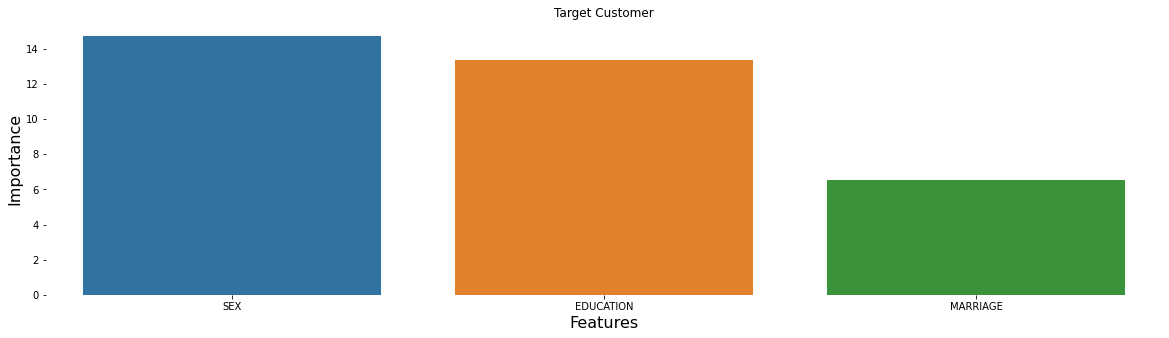

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=0)
sns.barplot(x='element', y='Score', data= featureScores)
plt.box(False)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.title('Target Customer')
plt.show()

Based on above information, I will add Education and Age into the features.

## Machine Learning Models

Creating features and target and balancing the data using SMOTE to sdjust the imbalanced dataset.

In [ ]:
#pick  features for modeling
X = df_record[['NAME_INCOME_TYPE','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','CNT_FAM_MEMBERS','CNT_CHILDREN','AGE','YEARS_EMPLOYED']]# 

y = df_record['STATUS']

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(y == 2))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 

Before OverSampling, counts of label '1': 4455
Before OverSampling, counts of label '0': 31700 

Before OverSampling, counts of label '2': 302 

After OverSampling, the shape of train_X: (95100, 8)
After OverSampling, the shape of train_y: (95100,) 

After OverSampling, counts of label '1': 31700
After OverSampling, counts of label '0': 31700
After OverSampling, counts of label '2': 31700


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res,y_train_res,test_size=0.3, random_state=21)

In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (66570, 8)
X_test (28530, 8)
y_train (66570,)
y_test (28530,)


Now we will start the model building. The one reason we list these  varieties of algorithms are based on the requirement of ensembling model. To gurantee the performance of the Ensemble model, we need to let base models to be diverse and independant. Thus can reduce the prediction error. 

Before we start all models, we would like to mention the general process we did for models. We either use algorithm or choose manually for hyperparameters. For the training part, we use cross validation to test how well model fits the training data. We use fold crossvalidation for its low bias and modest variance.

In [ ]:
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [ ]:
# Collect all scores and mean accuracy
Scores = []
CV_Scores = []
Accuracy = []
Precision = []
Recall = []
F1_score = []
Roc_auc_score = []
models = ['logistic regression', 'Random Forest']

In the model part, we choose Logistic regression and Random forest and do a comparison to choose the best one.

We start with simplest model for categorical variable, logistic regression.  

### Logistic regression

In [ ]:
#Creating the dependent variable class
factor = pd.factorize(df_record['STATUS'])
df_record.STATUS = factor[0]
definitions = factor[1]
print(df_record.STATUS.head())
print(definitions)

0    0
1    0
2    0
3    0
4    1
Name: STATUS, dtype: int64
Int64Index([0, 1, 2], dtype='int64')


After building the model, I will test my model by looking at the Confusion Matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

# Start with multi class logistic regression
Model_LogReg = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')
Model_LogReg.fit(X_train, y_train)

# Predicting the Test set results
LR_y_pred = Model_LogReg.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
LR_y_pred = np.vectorize(reversefactor.get)(LR_y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, LR_y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

Predicted Species     0     1     2
Actual Species                     
0                  4077  2795  2680
1                  3361  2759  3335
2                  2069  2051  5403


In [ ]:
# fold validation
cv_score = cross_val_score(estimator = Model_LogReg, X = X_train, y = y_train, cv = 5,verbose = 1)

print('###### Logistic Regression ######')
print('Score : %.4f' % Model_LogReg.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,LR_y_pred))
print('Precision:', 100* precision_score(y_test,LR_y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,LR_y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,LR_y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,LR_y_pred))
Precision.append(100* precision_score(y_test,LR_y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,LR_y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,LR_y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(Model_LogReg.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


###### Logistic Regression ######
Score : 0.4290
cv_score : 0.4345
Accuracy: 42.898703119523304
Precision: 42.17574700636089
Recall: 42.898703119523304
F1-score: 42.26738251317089


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s finished


It is not satisfying since the result is lower than the random guess of null error rate.

Then we are going to build the Random Forest

### Random forest

For the random forest hyperparameters tuning, one reference suggested randomforest search cv for finding hyperparameters. Since it is also a computing -expensive process on colab, we determine to choose the values manually. 

In this model, higher number of trees will reduce the variance of model. n_estimators means the number of trees in the forest, and the default 100 n_estimators does perform good in our model. We vary n_estimators based on one of our reference on suggestion. When the number of trees is high, it is also better for model to learn the data, due to the imbalanced nature of the dataset, we set weight to be balanced. Since higher max_depth may raise the risk of overfitting the training data, we set it to be 10 as some literature suggested.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RF_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = RF_model.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
RF_y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

Predicted Species     0     1     2
Actual Species                     
0                  7850  1361   341
1                  1229  7836   390
2                   178    88  9257


In [ ]:
cv_score = cross_val_score(estimator = RF_model, X = X_train, y = y_train, cv = 5,verbose = 1)

print('###### Random Forest ######')
print('Score : %.4f' % RF_model.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,RF_y_pred))
print('Precision:', 100* precision_score(y_test,RF_y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,RF_y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,RF_y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,RF_y_pred))
Precision.append(100* precision_score(y_test,RF_y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,RF_y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,RF_y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(RF_model.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


###### Random Forest ######
Score : 0.8743
cv_score : 0.8633
Accuracy: 87.4272695408342
Precision: 87.29640550799101
Recall: 87.4272695408342
F1-score: 87.33467987685653


The results has a quite satisfying value with both high accuracy and high precision.

### Calculating the AUC and ROC scores

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
LR_y_pred = lb.transform(LR_y_pred)
LR_roc_auc_score = roc_auc_score(y_test, LR_y_pred, average="macro")
Roc_auc_score.append(100* LR_roc_auc_score)
print("roc_auc_score", LR_roc_auc_score)

roc_auc_score 0.571559196966945


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
RF_y_pred = lb.transform(RF_y_pred)
RF_roc_auc_score = roc_auc_score(y_test, RF_y_pred, average="macro")
Roc_auc_score.append(100* RF_roc_auc_score)
print("roc_auc_score", RF_roc_auc_score)

roc_auc_score 0.905681933347537


## Model Selection

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'Scores' : Scores, 'Cross_Val' : CV_Scores, 'Accuracy(%)':Accuracy, 'Precision(%)':Precision, 'Recall(%)':Recall, 'F1-score(%)':F1_score, 'Roc_auc_score(%)': Roc_auc_score})
compare.sort_values(by='Scores' ,ascending=False)

,Algorithms,Scores,Cross_Val,Accuracy(%),Precision(%),Recall(%),F1-score(%),Roc_auc_score(%)
1,Random Forest,0.874273,0.863287,87.427270,87.296406,87.427270,87.334680,90.568193
0,logistic regression,0.428987,0.434535,42.898703,42.175747,42.898703,42.267383,57.155920


When we compared with all the models, it is noticeable the random forest has the highest F1-score with 87%. However, the logistic regression is not suitable to be used in this dataset to predictsince it is almost close to the random score with only 42%. Therefore, we choose the random forest model to do the further exploration on our next research question.

Based on the given information, determine if the applicant can be approved for the credit card? Since we've built the model, we are good to input some sample applicant data to check if the applicant will be approved a credit card. 

In [ ]:
# define input samples for prediction
new_input = X_train.sample(5)
new_input

,NAME_INCOME_TYPE,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,AGE,YEARS_EMPLOYED
48729,2,0,3,4,1.000000,0,42,4.350000
87545,0,0,2,2,1.106767,0,32,0.549294
72176,1,0,1,4,2.000000,0,58,0.000000
15050,4,1,0,4,3.000000,1,36,6.710000
40330,2,1,1,4,2.000000,0,57,6.520000


In [ ]:
# get prediction for new input
new_output = RF_model.predict(new_input)
new_output

array([1, 2, 2, 0, 1], dtype=int64)

Based on the predict result, the 1st and the 5th applicants information can be approved credit card. By looking at the information, they both have a long term years_employed , secondary education and income_type is 2, which is also make sense in real life.

how likely the candidate may postpone their payment to the credit card company? If it is, how long will the payment be? For this research, we do see the 2rd and 3rd applicant might postpone the payment for 4-7 months. It's hard to collect this such payment. Fot the 3rd applicant, he/she might postpone the payment withing 3 month, which is a better to collect the money back but still unsafe to issue the credit card.

## Conclusions

Finally we get conclusion that our essemble models gave a satisfying result on accuracy of whether approving the credit card for applicants. Although it does not give the high score of all models,  random forest helps to reduce generalization error. Therefore, the accuracy of this prediction does help credit card companies choose their target customers to some extent. 

## Reference

1. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
2. https://machinelearningmastery.com/random-forest-ensemble-in-python/
3. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
